In [1]:
import cv2

dataset link= 'https://www.kaggle.com/c/dogs-vs-cats'

In [2]:
import numpy as np
import os
from random import shuffle

TRAIN_DIR ='C:/Users/DELL/Desktop/python/tensor/cnn/dog_vs_cat/train'
TEST_DIR ='C:/Users/DELL/Desktop/python/tensor/cnn/dog_vs_cat/test'
IMG_SIZE=50
LR=1e-3 #0.001

MODEL_NAME='dogsvscats-{}-{}.model'.format(LR,'2conv-basic')

In [3]:
def label_img(img):
    word_label=img.split('.')[-3]
    if word_label=='cat':
        return [1,0]
    elif word_label=='dog':
        return [0,1]

In [7]:
def create_train_data():
    training_data=[]
    for img in os.listdir(TRAIN_DIR):
        label=label_img(img)
        path=(TRAIN_DIR+'/'+img)
        img=cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE),(IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img),np.array(label)])
    shuffle(training_data)
    np.save('train_data.npy',training_data)
    return training_data

In [8]:
def process_test_data():
    testing_data=[]
    for img in os.listdir(TEST_DIR):
        path=(TRAIN_DIR+'/'+img)
        img_num=img.split('.')[0]
        img=cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE),(IMG_SIZE,IMG_SIZE))
        testing_data.append([np.array(img),img_num])
    np.save('test_data.npy',testing_data)
    return testing_data

In [9]:
train_data=create_train_data()
# already train
#train_data=np.load('train_data.npy')

C:\Users\DELL\anaconda3\envs\tensor\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [10]:
len(train_data)

25000

In [11]:
train_data

[[array([[128, 120, 129, ..., 106, 105, 107],
         [123, 124, 121, ..., 109, 126, 122],
         [114, 125, 122, ..., 112, 102, 107],
         ...,
         [217, 162, 112, ..., 107, 110, 105],
         [130, 122, 119, ..., 120, 102,  97],
         [158, 143, 113, ..., 178, 102, 128]], dtype=uint8),
  array([0, 1])],
 [array([[ 67,  85,  66, ..., 255, 255, 255],
         [ 72,  90,  63, ..., 255, 255, 255],
         [ 90,  71,  38, ..., 255, 255, 255],
         ...,
         [116, 124, 139, ..., 255, 255, 255],
         [109,  94, 107, ..., 255, 255, 255],
         [ 97, 108, 114, ..., 255, 255, 255]], dtype=uint8),
  array([1, 0])],
 [array([[ 32,  46,  26, ...,  55,  62,  48],
         [ 37,  36,  39, ...,  24,  21,  43],
         [ 29,  43,  44, ...,  31,  27,  57],
         ...,
         [ 77,  86,  87, ..., 112, 109,  64],
         [ 84,  77,  89, ..., 132, 105, 119],
         [ 78,  77,  84, ..., 130, 115, 123]], dtype=uint8),
  array([1, 0])],
 [array([[112, 112, 113, ...,  

In [12]:
if os.path.exists('{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print("model loaded!")

In [13]:
X=np.array([i[0] for i in train_data])
#X = X.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [14]:
X=X/255.0
X=X.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y=np.array([i[1] for i in train_data])

In [15]:
len(X)

25000

In [16]:
len(y)

25000

In [17]:
X

array([[[[0.50196078],
         [0.47058824],
         [0.50588235],
         ...,
         [0.41568627],
         [0.41176471],
         [0.41960784]],

        [[0.48235294],
         [0.48627451],
         [0.4745098 ],
         ...,
         [0.42745098],
         [0.49411765],
         [0.47843137]],

        [[0.44705882],
         [0.49019608],
         [0.47843137],
         ...,
         [0.43921569],
         [0.4       ],
         [0.41960784]],

        ...,

        [[0.85098039],
         [0.63529412],
         [0.43921569],
         ...,
         [0.41960784],
         [0.43137255],
         [0.41176471]],

        [[0.50980392],
         [0.47843137],
         [0.46666667],
         ...,
         [0.47058824],
         [0.4       ],
         [0.38039216]],

        [[0.61960784],
         [0.56078431],
         [0.44313725],
         ...,
         [0.69803922],
         [0.4       ],
         [0.50196078]]],


       [[[0.2627451 ],
         [0.33333333],
         [0.25

In [18]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(50,50,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(2, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [19]:
from tensorflow import keras
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [20]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Dogvscat")

In [21]:
tuner_search.search(X,y,epochs=10, validation_split=0.1)

Trial 5 Complete [00h 03m 04s]
val_accuracy: 0.503600001335144

Best val_accuracy So Far: 0.7459999918937683
Total elapsed time: 00h 16m 03s
INFO:tensorflow:Oracle triggered exit


In [22]:
model=tuner_search.get_best_models(num_models=1)[0]

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 48)        1248      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        27712     
_________________________________________________________________
flatten (Flatten)            (None, 123904)            0         
_________________________________________________________________
dense (Dense)                (None, 96)                11894880  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 194       
Total params: 11,924,034
Trainable params: 11,924,034
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(X,y, epochs=20, validation_split=0.1, initial_epoch=10)

Epoch 11/20
704/704 [==============================] - 21s 29ms/step - loss: 0.3034 - accuracy: 0.8675 - val_loss: 0.6284 - val_accuracy: 0.7264
Epoch 12/20
704/704 [==============================] - 22s 32ms/step - loss: 0.1852 - accuracy: 0.9247 - val_loss: 0.7794 - val_accuracy: 0.7344
Epoch 13/20
704/704 [==============================] - 22s 32ms/step - loss: 0.0992 - accuracy: 0.9641 - val_loss: 1.0785 - val_accuracy: 0.7184
Epoch 14/20
704/704 [==============================] - 22s 32ms/step - loss: 0.0522 - accuracy: 0.9835 - val_loss: 1.2666 - val_accuracy: 0.7192
Epoch 15/20
704/704 [==============================] - 22s 32ms/step - loss: 0.0321 - accuracy: 0.9914 - val_loss: 1.3537 - val_accuracy: 0.7188
Epoch 16/20
704/704 [==============================] - 22s 32ms/step - loss: 0.0474 - accuracy: 0.9845 - val_loss: 1.5548 - val_accuracy: 0.7312
Epoch 17/20
704/704 [==============================] - 23s 32ms/step - loss: 0.0204 - accuracy: 0.9939 - val_loss: 1.7911 - val_ac

In [25]:
model.save('2convo-catvsdog.model')

INFO:tensorflow:Assets written to: 2convo-catvsdog.model\assets


In [37]:
CATEGORIES = ['Cat', 'Dog']


def image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    new_arr = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    new_arr = np.array(new_arr)
    new_arr = new_arr.reshape(-1,IMG_SIZE,IMG_SIZE, 1)
    return new_arr

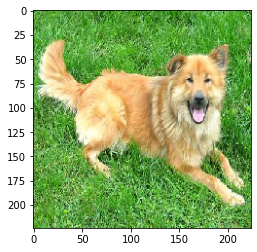

In [38]:
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
image_plt = load_img('test/4.jpg', target_size=(224, 224))
plt.imshow(image_plt)

In [39]:
y_pred=model.predict([image('test/4.jpg')])

In [40]:
y_pred

array([[0., 1.]], dtype=float32)

In [41]:
CATEGORIES[y_pred.argmax()]

'Dog'

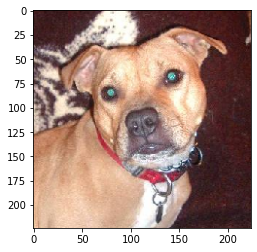

In [42]:
image_plt = load_img('test/2.jpg', target_size=(224, 224))
plt.imshow(image_plt)

In [43]:
y_pred=model.predict([image('test/2.jpg')])
CATEGORIES[y_pred.argmax()]

'Dog'

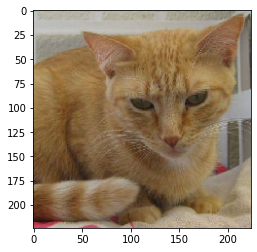

In [46]:
image_plt = load_img('test/45.jpg', target_size=(224, 224))
plt.imshow(image_plt)

In [47]:
y_pred=model.predict([image('test/45.jpg')])
CATEGORIES[y_pred.argmax()]

'Cat'